# Imports

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import BaggingClassifier


from sklearn.model_selection import cross_val_score


In [2]:
df = pd.read_csv("star_classification.csv")

# Exploratory Data Analysis

**Content**
- **obj_ID**: Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
- **alpha**: Right Ascension angle (at J2000 epoch)
- **delta**: Declination angle (at J2000 epoch)
- **u**: Ultraviolet filter in the photometric system
- **g**: Green filter in the photometric system
- **r**: Red filter in the photometric system
- **i**: Near Infrared filter in the photometric system
- **z**: Infrared filter in the photometric system
- **run_ID**: Run Number used to identify the specific scan
- **rereun_ID**: Rerun Number to specify how the image was processed
- **cam_col**: Camera column to identify the scanline within the run
- **field_ID**: Field number to identify each field
- **spec_obj_ID**: Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
- **class**: object class (galaxy, star or quasar object)
- **redshift**: redshift value based on the increase in wavelength
- **plate**: plate ID, identifies each plate in SDSS
- **MJD**: Modified Julian Date, used to indicate when a given piece of SDSS data was taken
- **fiber_ID**: fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

**Citation**
*fedesoriano. (January 2022). Stellar Classification Dataset - SDSS17. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/stellar-classification-dataset-sdss17.*

In [ ]:
df.head(7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [5]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [6]:
df['class'].value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

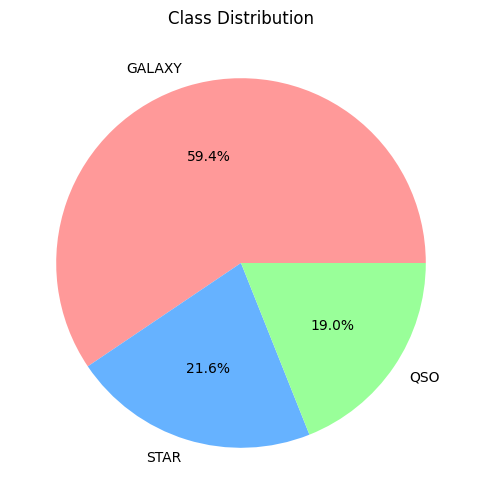

In [7]:

class_counts = df['class'].value_counts()

colors = ['#FF9999', '#66B2FF', '#99FF99']  

plt.figure(figsize=(10, 6))
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Class Distribution')

plt.show()

**Null values**

In [9]:
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

**Label Encoding**

In [10]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].astype(str)
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

**Correlation**

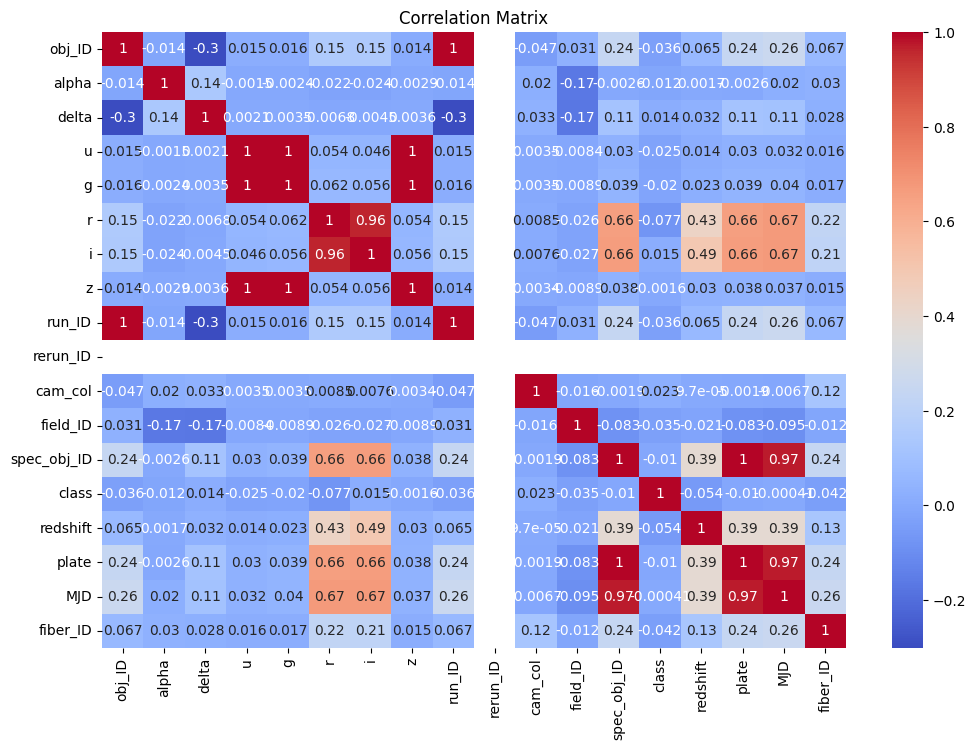

In [11]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [12]:
correlation_matrix = df.corr()

threshold = 0.5  
low_correlated_features = np.where(np.abs(correlation_matrix) > threshold)

for feature1, feature2 in zip(low_correlated_features[0], low_correlated_features[1]):
    if feature1 != feature2:
        print(f"{df.columns[feature1]} and {df.columns[feature2]} are low correlated.")

obj_ID and run_ID are low correlated.
u and g are low correlated.
u and z are low correlated.
g and u are low correlated.
g and z are low correlated.
r and i are low correlated.
r and spec_obj_ID are low correlated.
r and plate are low correlated.
r and MJD are low correlated.
i and r are low correlated.
i and spec_obj_ID are low correlated.
i and plate are low correlated.
i and MJD are low correlated.
z and u are low correlated.
z and g are low correlated.
run_ID and obj_ID are low correlated.
spec_obj_ID and r are low correlated.
spec_obj_ID and i are low correlated.
spec_obj_ID and plate are low correlated.
spec_obj_ID and MJD are low correlated.
plate and r are low correlated.
plate and i are low correlated.
plate and spec_obj_ID are low correlated.
plate and MJD are low correlated.
MJD and r are low correlated.
MJD and i are low correlated.
MJD and spec_obj_ID are low correlated.
MJD and plate are low correlated.


**Dropping the columns**

In [13]:
df = df.drop(['MJD','run_ID','obj_ID','rerun_ID','field_ID','spec_obj_ID','fiber_ID','plate'], axis=1)

In [15]:
df.head(10)

,alpha,delta,u,g,r,i,z,cam_col,class,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,2,0,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,5,0,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,2,0,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,3,0,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,3,0,0.116123
5,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,3,1,1.424659
6,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,2,1,0.586455
7,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,2,0,0.477009
8,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,5,0,0.660012
9,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,4,2,-0.000008


**Preparing the Data for training**

In [16]:
X = df.drop('class', axis=1)
y = df['class']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

*Logistic Regression*

In [17]:
clf = LogisticRegression(random_state=42)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 85.42%


c:\Users\ahmed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


*Random Forest Classifier*

In [18]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
print(f"Accuracy: {scores.mean() * 100:.2f}% (+/- {scores.std() * 2 * 100:.2f})")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

Accuracy: 97.88% (+/- 0.14)
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     14895
           1       0.97      0.92      0.95      4769
           2       1.00      1.00      1.00      5336

    accuracy                           0.98     25000
   macro avg       0.98      0.97      0.97     25000
weighted avg       0.98      0.98      0.98     25000



*Bagging Classifier*

In [21]:
clf = BaggingClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 97.79%


*KNeighbors Classifier*

In [22]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 83.12%


These results highlight the effectiveness of *ensemble methods* like Random Forest and Bagging Classifier in handling complex classification tasks.